In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [4]:
np.unique(y_train)

<IPython.core.display.Javascript object>

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Shape of imported MNIST datasets

In [5]:
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (60000, 28, 28)
Shape of y_train :  (60000,)
Shape of x_test :  (10000, 28, 28)
Shape of y_test :  (10000,)


In [6]:
#Flattening the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [7]:
#Normalization of data
x_train= x_train/255.0
x_test= x_test/255.0

In [8]:
#Shape of dataset after flattening
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (60000, 784)
Shape of y_train :  (60000,)
Shape of x_test :  (10000, 784)
Shape of y_test :  (10000,)


<IPython.core.display.Javascript object>

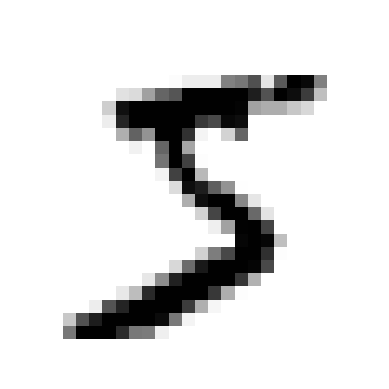

<IPython.core.display.Javascript object>

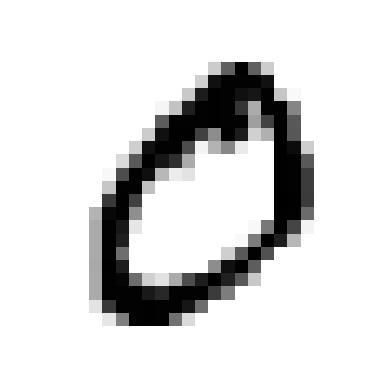

<IPython.core.display.Javascript object>

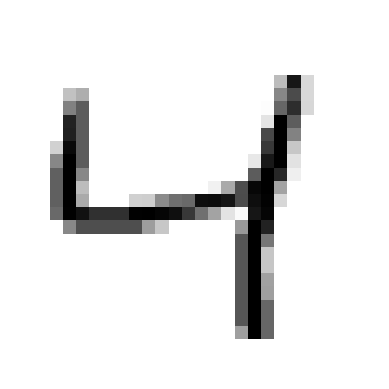

<IPython.core.display.Javascript object>

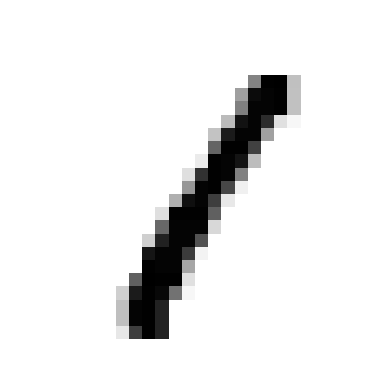

<IPython.core.display.Javascript object>

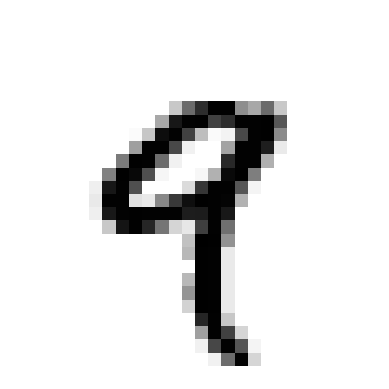

In [9]:
for i in range(0,5):
    digit= x_train[i]
    digit_img = digit.reshape(28,28)
    plt.imshow(digit_img, cmap = mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [10]:
for i in range(0, 5):
    print("%sth image depicts : %s "%(i, y_train[i]))

0th image depicts : 5 
1th image depicts : 0 
2th image depicts : 4 
3th image depicts : 1 
4th image depicts : 9 


# Training models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Logistic Regression

In [13]:
model_lr = LogisticRegression(max_iter=100)

In [14]:
model_lr.fit(x_train, y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#Score without normalization
model_lr.score(x_test, y_test)

0.9257

In [35]:
import numpy as np
y_pred = model_lr.predict(x_test)
#y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9257

In [16]:
#Score with normalization
model_lr.score(x_test, y_test)

0.9257

In [17]:
y_predicted_lr= model_lr.predict(x_test)
cm = confusion_matrix(y_test, y_predicted_lr)
cm

array([[ 959,    0,    0,    3,    1,    7,    5,    4,    1,    0],
       [   0, 1111,    4,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  926,   16,    9,    4,   13,    6,   39,    4],
       [   4,    1,   18,  917,    1,   22,    4,   11,   25,    7],
       [   1,    1,    7,    3,  914,    0,   10,    4,   10,   32],
       [  10,    2,    3,   34,    7,  783,   14,    6,   29,    4],
       [   9,    3,    8,    2,    7,   14,  912,    2,    1,    0],
       [   1,    8,   24,    5,    7,    1,    0,  950,    3,   29],
       [   9,   11,    8,   23,    7,   25,   12,    7,  860,   12],
       [   9,    8,    0,   11,   24,    6,    0,   19,    7,  925]],
      dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

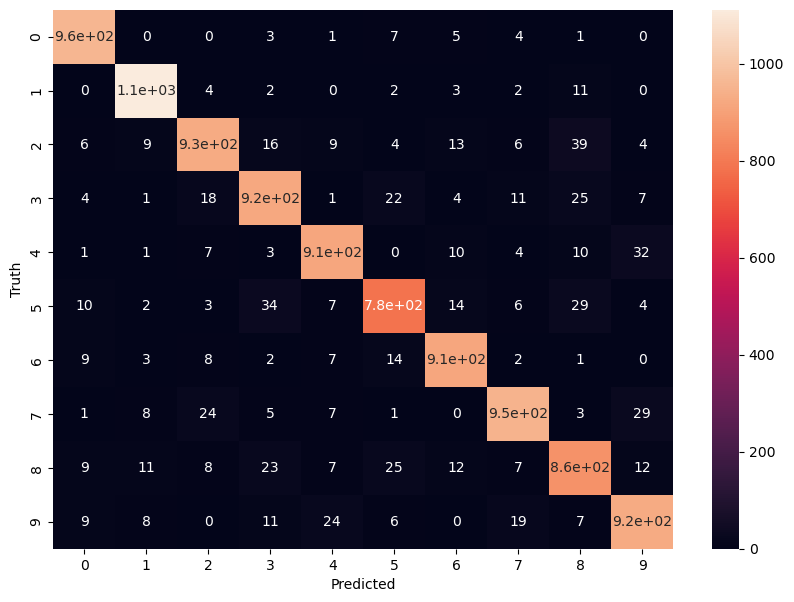

In [18]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_predicted_lr, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [22]:
model_lr.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
model_lr.intercept_

array([-1.33533268,  1.21984908,  0.09008964, -0.59039442,  0.2312813 ,
        2.01648249, -0.48369929,  1.56360927, -2.19811399, -0.51377138])



## Decision Tree 

In [24]:
model_dt = DecisionTreeClassifier()

In [25]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_predicted_dt= model_dt.predict(x_test)
print(accuracy_score(y_test, y_predicted_dt))
cm = confusion_matrix(y_test, y_predicted_dt)
cm

0.8775


array([[ 918,    0,    6,    6,    8,   10,    9,    5,   11,    7],
       [   2, 1088,   11,    5,    2,    5,    7,    3,   11,    1],
       [  15,    8,  886,   32,   12,    9,   12,   28,   25,    5],
       [   8,    7,   32,  862,    5,   39,    5,   10,   23,   19],
       [   7,    6,   10,    4,  857,    7,   18,   10,   22,   41],
       [  13,    9,    5,   45,    7,  750,   20,    5,   25,   13],
       [  16,    4,    9,    6,   26,   24,  846,    1,   23,    3],
       [   2,   14,   24,   15,    8,    3,    3,  928,    7,   24],
       [  12,    8,   31,   43,   19,   26,   14,   12,  781,   28],
       [  16,    5,    6,   20,   40,   15,    5,   21,   22,  859]],
      dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

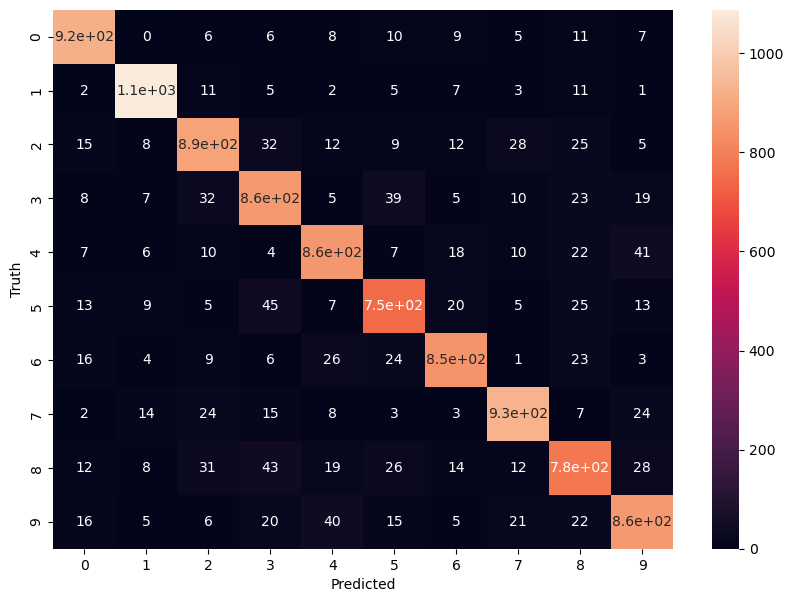

In [27]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [28]:
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_predicted_dt, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.84      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.82      0.80      0.81       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Hyperparameter tuning of Decision Tree model

In [29]:
#criterion, max_depth, min_samples_split, and min_samples_leaf. 

In [30]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a decision tree classifier
dtree_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best estimator from the grid search
best_dtree_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_dtree_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
best_params = grid_search.best_params_

# Print best parameters and accuracy
print(f"Best parameters: {best_params}")
print(f"Test accuracy: {accuracy}")

# Print classification report
target_names = [str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names=target_names))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy: 0.8818
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.87      1032
           3       0.84      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.89      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Random Forest

Random Forest Accuracy: 0.9704
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  989    2   10]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]


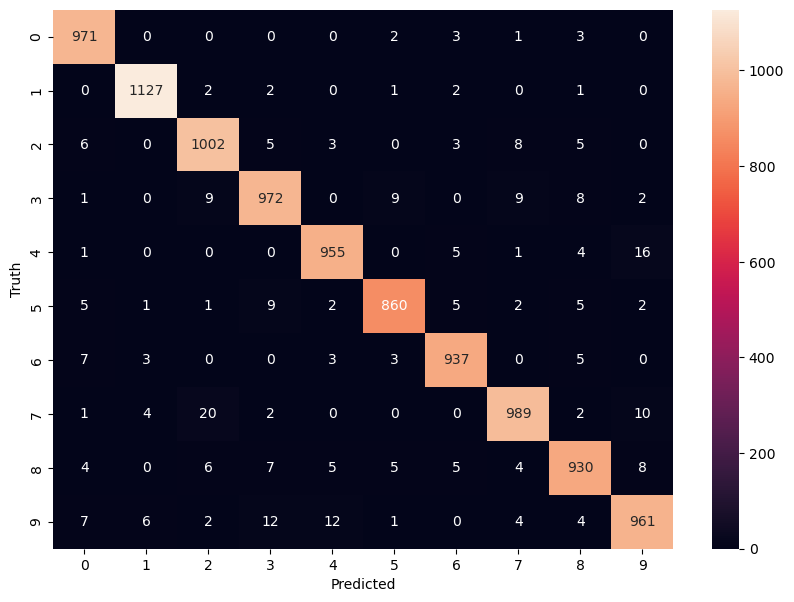

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(x_train, y_train)

# Predict on test data
y_predicted_rf = model_rf.predict(x_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_predicted_rf))
cm_rf = confusion_matrix(y_test, y_predicted_rf)
print(cm_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Print classification report
print(classification_report(y_test, y_predicted_rf, target_names=[str(i) for i in range(10)]))


# Naive Bayes

Naive Bayes Accuracy: 0.5558
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


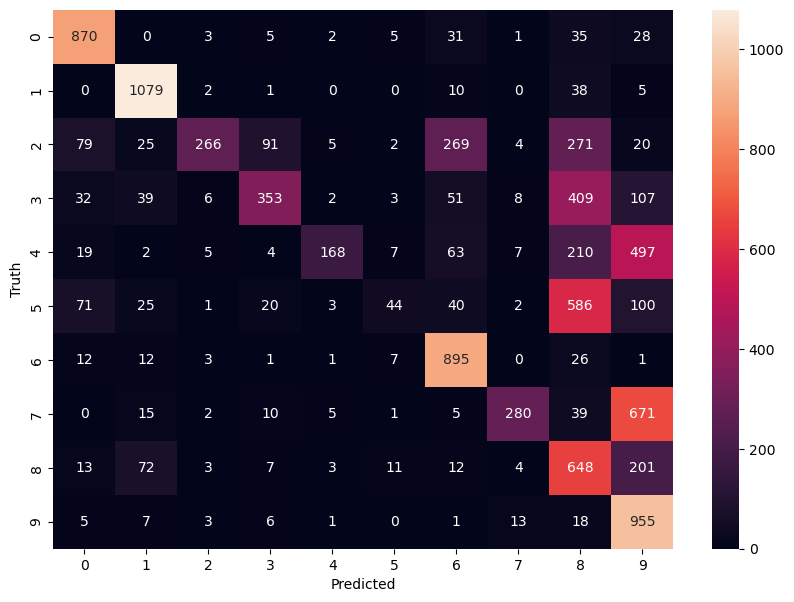

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



In [14]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
model_nb = GaussianNB()

# Train the model
model_nb.fit(x_train, y_train)

# Predict on test data
y_predicted_nb = model_nb.predict(x_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_predicted_nb))
cm_nb = confusion_matrix(y_test, y_predicted_nb)
print(cm_nb)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Print classification report
print(classification_report(y_test, y_predicted_nb, target_names=[str(i) for i in range(10)]))
